# Chapter 7. 신경망,딥러닝

- 신경망 모델은 머신러닝의 한 방법
- 딥러닝(심층 학습)은 층을 deep 하게 쌓은 신경망 모델

## 7.1 뉴런모델
- 신경망 모델: 뉴런 모델(뇌의 신경 세포 바탕으로 만들어진 수학적 모델) 단위로 구축
- 신경 세포가 영어로 neuron -> 뉴런 모델이라고 함

### 7.1.1 신경 세포

[1] 축삭
- 신경세포 속 뉴런에서 뻗어나온 가지(케이블)이 있고, 이를 축삭이라 함
- 전기적 펄스(자극) 다른 신경세포에 전달하는 역할 
- "시냅스(synapse)"라는 인터페이스를 통해 펄스를 신경세포에 전달

[2] 신경세포
- 다른세포에서온 전기적 펄스(자극)를 받으면 전기적 레벨,전위(electric potential)가 변화 함
- 영향을 미치는 요소는 크게 2가지

가. synapse에서 전위를 올리는 방향(양의 방향) / 내리는 방향(음의 방향) 종류가 정해짐  
나. 입력 받는 synapse의 상태(전달강도)에 따라서 변화 정도가 다름(예: 전달강도가 크면 -> 1개의 전개 펄스가 와도 전위가 크게 변화)

- 전위가 일정한 값(임계값)를 초과할 경우: 신경세포에서 전기적인 펄스 발신 후 펄스는 축삭을 타고 다음 신경세포로 전달
- 우리의 학습을 다양한 신경세포간의 synapse 전달강도의 변화에 따라 일어나는것으로 생각할 수 있음


### 7.1.2 뉴런 모델: 신경세포의 움직임을 단순화한 수학적 모델

#### 뉴런에 2개의 입력 $x=(x_0,x_1)$가 들어온다고 가정

- 입력값($x=(x_0,x_1)$): 실수(양수, 음수 모두 가능) 
- 가중치($w_0,w_1$): synapse 전달정도 
1. 입력 총합: 모든 입력에 정의한 가중치를 곱하여 합을 얻은 값 + 상수($W_2$: 절편을 나타내는 매개변수(bias parameter, bias 항)) 

$$ \alpha = w_0x_0 + w_1x_1 + w_2 $$

- 위의 식에서  항상 1을 갖는 3번째 입력 x2가 있다고 가정하면 더 간단하게 표현이 가능

$$ \alpha =  w_0x_0 + w_1x_1 + w_2x_2  = \displaystyle\sum_{i=0}^{2}w_ix_i $$

2. 출력값: 입력 총합 $\alpha$에 시그모이드 함수에 적용 
- 출력값은 0 ~ 1 사이의 연속값(sigmoid 특징)
- 가정: "출력값 = 단위 시간당 펄스 수(발화 빈도)"를 의미
- $\alpha$ 클수록 -> 발화 빈도는 1에 가까워짐(발화) / $\alpha$ -> 음의 큰 값일수록 -> 발화빈도 0에 가까워짐(발화하지 않음)

$$a= \frac{1}{1+exp(-a)}$$

3. 정리
- 위와 같이 정의된 Neuron 모델을 "Logistic Regression model"로 정의 

    -> 2차원 입력공간을 직선으로 나누어 One side에서는 0 ~ 0.5값을 other side에서는 0.5 ~ 1.0 숫자를 할당  
    -> 입출력맵
    
4. 일반화
$$a=\displaystyle\sum_{i=0}^{2} w_ix_i$$
$$a= \frac{1}{1+exp(-a)}$$

- $x_D$는 항상 1의 값을 가지는 Dummy input

#### 복습: Logistic Regression 모델 
[1] 목적함수: 평균 교차 Entropy Error

$$E(w)=-\frac{1}{N}\displaystyle\sum_{i=0}^{N-1} {t_niny_n +(1-t_n)in(1-y_n)}$$

[2] 이에 따른 매개변수 updata

$$w_i(t+1)=w_i(t) - α\frac{∂E}{∂W_i}$$

$$\frac{∂E}{∂W_i}=\frac{1}{N}\displaystyle\sum_{i=0}^{N-1} (y_n -t_n)x_{ni}$$

## 7. 2 신경망 모델

### 7.2.1  2층 피드 포워드 신경망
- 뉴런 모델: 입력 공간을 선으로 나눈다는 단순한 기능 / But 많이 조합하면 신경망(뉴런의 집합체모델) 모델 구축 가능
- 해당 문제: 한 방향으로만 흐르는 피드 포워드 신경망 고려(feedforward neural network model)

[네트워크를 수식적으로 정의]
- D: 입력차원 / M: 중간층 Neuron / K: 출력 차원
- 주의할점: 중간(은닉)층, 출력층의 입력총합 -> Dummy Nueron의 몫까지 포함하여 D+1,M+1임

<br>  
- 중간층의 입력총합
$$b_j =\sum_{i=0}^{D} {W_{ji}X_i}$$
- 중간층의 출력
$$z_j=h(b_j)$$
- 출력층의 입력총합
$$a_k=\displaystyle\sum_{j=0}^{M} {v_{kj}z_j}$$
- 출력층의 출력
$$y_k=\frac{exp(a_k)}{\sum_{l=0}^{K-1} exp(a_i)}=\frac{exp(a_k)}{u}$$

[실제 예]
- 2차원의 입력을 3개의 뉴런으로 출력 예시( 출력값이 각 카테고리에 속할 확률)

[1] 입력 2차원 + 항상 1을 가지는 더미 x2가 더해짐 => 중간층 두 개의 뉴런에 정보 전달
- i번째 입력 -> j번째 뉴런에 대한 가중치: $w_{ij}$ 
- j번째 입력총합: $b_j$

$$b_j =\displaystyle\sum_{i=0}^{2} {w_{ji}x_i} $$

[2] 중간층 Neruon의 출력 획득
- 입력 총합을 시그모이드 함수에 적용하여 중간층 뉴런의 출력을 획득($z_j$)
- h(): sigmoid 이외의 활성화 함수 모두 사용 가능
- 중간층 출력으로 출력층 Nueron의 활동이 정해짐 
$$z_j=h(b_j)$$

[3] 중간층 -> 출력층에 정보 전달
- 중간층 j번째 뉴런 -> 출력층 k번째 뉴런의 가중치: $v_kj$
- k번째의 뉴런의 입력총합: $a_k$
$$a_k=\displaystyle\sum_{j=0}^{2} {v_{kj}z_j}$$

[4] 출력층의 출력 $y_k$
- softxmax를 사용하였기에 확률적 해석이 가능해짐
- $u=\sum_{l=0}^{2} exp(a_i)$

$$y_k=\frac{exp(a_k)}{\sum_{l=0}^{2} exp(a_i)}=\frac{exp(a_k)}{u}$$

### 7.2.2 2층 피드 포워드 신경망의 구현

- 데이터를 X_train, T_train, X_test, T_test로 나누는 이유: overfitting 판단하기 위함

In [1]:
import numpy as np


# 데이터 정의 
np.random.seed(seed=1)                # 난수 고정
N, K= 200, 3                          # 데이터와 분포의 수 설정(N = 데이터 / K = 분포)
T = np.zeros((N, 3), dtype=np.uint8)  # y값 array 정의
X = np.zeros((N, 2))                   
 
# 데이터의 분포 설정
X_range0 = [-3, 3]                     # X0의 범위 정의
X_range1 = [-3, 3]                     # X1의 범위 정의
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 생성 분포(난수) 중심 정의: Class별
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])   # 생성 분포(난수) 분산 정의
Pi = np.array([0.4, 0.8, 1])                     # 각 분포 비율

# 데이터 생성
for n in range(N):                     
    wk = np.random.rand()               # 0 ~ 1 사이의 값 생성(임계값)
    for k in range(K):                  # 생성된 난수의 값에 따라서 class결정
        if wk < Pi[k]:                  # 분포 비율에 따라서 class를 ont-hot 형태로 저장
            T[n, k] = 1 
            break 
    for k in range(2):                  # 
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + \
        Mu[T[n, :] == 1, k]

In [2]:
# Train, Test data split
TestRatio = 0.5                   # Test data 비율
X_n_training = int(N * TestRatio) # Train데이터 수(위에서 정의한 Test data 비율에 따라 달라짐)

## Train 분리(index로 분리)
X_train = X[:X_n_training, :]       
T_train = T[:X_n_training, :]

## Test 분리
X_test = X[X_n_training:, :]
T_test = T[X_n_training:, :]


# 생성된 데이터를 npz 형식으로 저장
np.savez('class_data.npz', X_train=X_train, T_train=T_train, X_test=X_test, T_test=T_test, X_range0=X_range0, X_range1=X_range1)

- **Show_data(x,t)**: 데이터 분포 시각화(Train, Test 모두 사용가능)

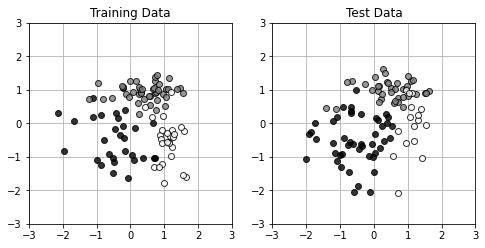

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 시각화 함수
def Show_data(x, t):
    wk, n = t.shape                                     # wk: data count / n: class 구분
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]            # 각 class별 다른 색깔로 구분하기 위해서 색깔 지정
    
    for i in range(n):                                  # class별 시각화하기 위해서 for 문 사용(3번)
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],# 각 class에 해당하는 x0, x1 좌표 추출후 ploting
                 linestyle='none',
                 marker='o', markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)


# 함수 호출
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)

## train 데이터 시각화
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')

## tets 데이터 시각화
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

####  3 classification Network 만들기 

- FNN: 2 floor feedfoard Network 함수(입력 x[D차원 벡터] => 출력 y[K차원 벡터])
- 본 code에서는 D=2, K=3이라고 가정

#### 네트워크함수 설계시 특징
- N개의 데이터를 한꺼번에 처리하도록 설계
- x(N * D차원 행렬), y(N * K차원 행렬)
- y의 vector 요소(두번째 인수 0,1,2) => 클래스에 속할 가능성으로 모두 더하면 확률의 정의 1
- Network의 parameter: 출력층의 뉴런의 수(M), 출력의 차원 수(K)
- 중간층의 bias neuron을 고려: 중간층 가중치 W는 M *(D+1)행렬, V는 K *(M+1) 행렬 
- W와 V의 정보는 둘을 하나로합친벡터 WV로 전달

    -> 예시: 중간층 뉴런 수 M=2, 출력 차수 k=3의 경우.

 $W= \begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \end{bmatrix}$  

 $V= \begin{bmatrix} 6 & 7 & 8 \\ 9 & 10 & 11 \\ 12 & 13& 14 \end{bmatrix} $ 
 
 $$wv=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])$$


In [39]:
# 시그모이드 함수 정의
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


# 네트워크 정의 함수
def FNN(wv, M, K, x): # wv: 은닉층 매개 변수,, 출력 매개변수를 한 벡터로 표현 / M: 은닉층 뉴런 수 / K: 출력층 뉴런 수, x: 입력 데이터
    
    ## (1) 네트워크 요소(입력, 은닉, 출력층)에 대한 정의
    N, D = x.shape                        # 입력 차원
    w = wv[:M * (D + 1)]                  # 중간층 뉴런의 가중치 정의(wv 벡터 中 M * (D + 1) 만큼 추출 / bias의 가중치도 있으므로 D+1)
    w = w.reshape(M, (D + 1))             # Vector 형식 -> M * (D + 1) matrix 변환
    
    v = wv[M * (D + 1):]                  # 출력층 뉴런의 가중치(wv 벡터 중 나머지(K * (M + 1)) 추출 / bias의 가중치도 있으므로 M+1)
    v = v.reshape((K, M + 1))             # Vector 형식 -> K * (M + 1) matrix 변환
    
    b = np.zeros((N, M + 1))              # 중간층 뉴런의 입력 총합 : N * (M + 1)  / why? M+1 : bias를 포함..?
    z = np.zeros((N, M + 1))              # 중간층 뉴런의 출력      : N * (M + 1)
    a = np.zeros((N, K))                  # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K))                  # 출력층 뉴런의 출력
    
    
    ## (2) 중간층의 계산
    for n in range(N):                   # n(행) : 데이터  / m(가중치번호) 
        
        ### 중간층 계산(중간 입력 총합 / 중간 뉴런 출력값) 
        for m in range(M):   
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # 입력차원 + 더미 입력 => 3차원으로 형성 / 내적 -> 입렬 총합을 계산(열: 각 class)
            z[n, m] = Sigmoid(b[n, m])                   # 입력 총합 -> 활성화함수를 거쳐 출력값으로

        ### 출력층의 계산
        z[n, M] = 1                                      # 더미 뉴런
        wkz = 0                                          # softmax 계산할 때 분모(u) 초기화
        
        ### 하나의 데이터의 각각의 class에 대한 출력 값 추출
        for k in range(K):                              
            a[n, k] = np.dot(v[k, :], z[n, :])           # 중간층 출력값(출력층 입력값)과 weight의 내적 -> 출력 총합을 계산
            wkz = wkz + np.exp(a[n, k])                  # 출력 총합을 더해줌
            
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz              # 각각의 출력값을 출력 총합을 나눠서 softmax 적용(0 ~ 1 사이의 확률)
    return y, a, z, b


# 동작 체크 (코드 error 여부 확인)
print("입력 : {}".format(X_train[:2,:]))
WV = np.ones(15)                  # WV의 크기(15): 은닉층 매개변수(M * D+1)) + 출력층 매개변수(K * (m+1))
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])     # 결과 확인
# y: 출력값(행: 데이터 / 열: class) / a: 출력층의 입력 총합(softmax 전) z:중간층의 출력(중간층의 입력 총합 sigmoid) b: 중간층의 입력총합

입력 : [[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]]


(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

### 7.2.3 수치 미분법
- 분류문제의 오차함수: 평균 교차 Entropy 오차
$$E(w,v)=-\frac{1}{N}\displaystyle\sum_{n=0}^{n-1}\displaystyle\sum_{k=0}^{k-1}  {t_{nk}log(y_nk)}$$

- **CE_FNN(wv, M, K, x, t)**: 평균 교차 Entropy
- 매개 변수 w와 v를 하나의 vector(wv) 표현)
- 변수 설명(네트워크 크기 결정 -> M(출력층 뉴런수), K(출력층 차원수) / 입력데이터 -> x, 목표데이터 -> t)
- x에 대한 예측값(출력값) y와 목표데이터 간의 Cross Entropy 계산

[중요] 경사하강법 =>오차함수를 매개변수로 한 편미분 식 필요 / 간단한 수치적 미분으로 구할 수 있음
- 각 매개변수를 구하기 위해서는 구하는 매개변수는 전 후로 ϵ 만큼 변화시키고, 나머지 매개변수를 고정하여 두점의 기울기, 편미분을 근사
- 차함수가 어느방향으로 기울어져있는지를 확인하는 방법 / 근사방법이지만  ϵ을 충분히 작게 취하기때문에, 근사치가 실제값에 충분히 가까워짐
- 단점:  매개변수의 미분을 계산하기 위해 매개변 수하나에 두 번의 오차 함수 계산(게산비용이 높아짐)

$$\frac{∂E}{∂w}\|_{w*}\simeq\frac{E(w^* +\epsilon)-E(w^* -\epsilon)}{2\epsilon}$$


$$\frac{∂E}{∂w}\|_{w_0^*,w_1^*,w_2^*}\simeq\frac{E(w_0^* +\epsilon,w_1^*,w_2^*)-E(w_0^* -\epsilon,w_1^*,w_2^*)}{2\epsilon}$$

In [16]:
# 평균 교차 엔트로피 오차 정의
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape                                          # 데이터 개수, 입력 차원 정의
    y, a, z, b = FNN(wv, M, K, x)                           # 입력한 x에 대한 각각의 출력값  
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N  # 출력값(y)과 목표값(t)을 vector로 표현후 내적을 통해 Cross Entropy 계산
    return ce


# 동작 체크 (코드 error 여부 확인)
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

In [55]:
M = 2
K = 3
nWV = M * 3 + K * (M + 1)

# 초기값에 따른 수치 미분 변화 값 확인(난수 고정: random 하게 weight 초기값이 배정 -> 이에 따른 각 매개 변수별 편미분 값 변화/미분)
np.random.seed(1)
wv = np.random.normal(0, 1, nWV)      
print(wv)

x, t =  X_train[:2, :], T_train[:2, :]
epsilon = 0.001                             # 엡실론 값 
dwv = np.zeros_like(wv)                     # 매개변수 


for iwv in range(len(wv)):                   # 매개변수에 대응해서 진행(매개변수별로 계산 -> 편미분)
    wv_modified = wv.copy()
    
    ## E(w - e) 부분 계산: 15번 계산
    wv_modified[iwv] = wv[iwv] - epsilon     # 하나의 매개변수만 변화, 다른 매개변수는 고정
    mse1 = CE_FNN(wv_modified, M, K, x, t)   # 변화된 mse(오차) 계산
    
    ## E(w + e) 부분 계산:  15번 게산
    wv_modified[iwv] = wv[iwv] + epsilon     # 상동
    mse2 = CE_FNN(wv_modified, M, K, x, t)
    dwv[iwv] = (mse2 - mse1) / (2 * epsilon) # 수치 미분법 되입



[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944]


- **dCE_FNN(wv, M, K, x, t)**: 수치미분을 출력하는 함수
- **Show_WV(wv, M)**:  매개 변수의 값 시각화

- 15개의 가중치 매개변수 각각에 대한 수치 미분 값을 확인할 수 있음

최초의 weight parameter vector: 
[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944] 
각 weight parametr vecotr의 편미분 값: 
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


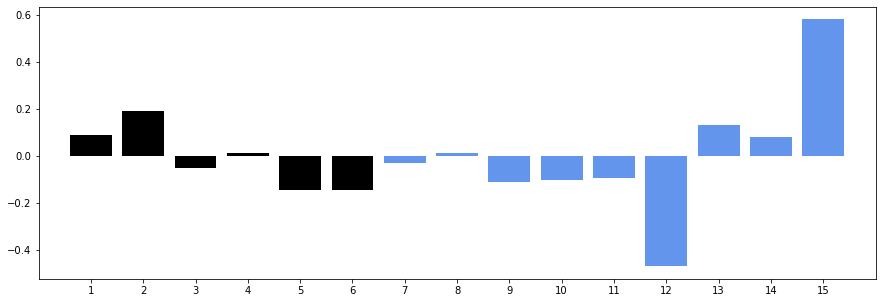

In [50]:
# 수치 미분법 정의 함수 
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001                             # 엡실론 값 
    dwv = np.zeros_like(wv)                     # 매개 변수 vector의 수치 미분값을 저장할 array 생성
    
    for iwv in range(len(wv)):                   # 매개변수에 대응해서 진행(매개변수별로 계산 -> 편미분)
        wv_modified = wv.copy()

        ## E(w - e) 부분 계산: 15번 계산
        wv_modified[iwv] = wv[iwv] - epsilon     # 하나의 매개변수만 변화, 다른 매개변수는 고정
        mse1 = CE_FNN(wv_modified, M, K, x, t)   # 변화된 mse(오차) 계산

        ## E(w + e) 부분 계산:  15번 게산
        wv_modified[iwv] = wv[iwv] + epsilon     # 상동
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon) # 수치 미분 계산
        
    return dwv


# 각 가중치에 값에 대한 시각화
def Show_WV(wv, M):
    N = wv.shape[0]
    ## 각 층별 매개변수의 다른 색깔로 시각화(계산 -> parameter vector화로 진행)
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')              # "입력 -> 은닉" 매개변수 
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align="center", color='cornflowerblue') # "은닉 -> 출력" 매개변수
    
    ## 기타 시각화 
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


# 동가 체크 (M: 은닉층의 뉴런 수 / k: 출력층의 차원)
M = 2
K = 3
nWV = M * 3 + K * (M + 1)

# 초기값에 따른 수치 미분 변화 값 확인(난수 고정: random 하게 weight 초기값이 배정 -> 이에 따른 각 매개 변수별 편미분 값 변화/미분)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)                                  # 매개변수 vector 생성
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])       # 위에서 정의한 매개변수 vector의 수치 미분을 계산(각가의 편미분)
print("최초의 weight parameter vector: \n{} ".format(WV))
print("각 weight parametr vecotr의 편미분 값: \n{}".format(dWV))

# weight별 수치 미분 값(각 매개 변수의 편미분 값 확인)
plt.figure(1, figsize=(15, 5))
Show_WV(dWV, M)
plt.show()

### 7.2.4 수치 미분법에 의한 경사 하강법
- **Fit_FNN_num(wv_init, M, k, x_train, t_train, x_test, t_test, n, alpha)** : 수치 미분법에 의한 경사 하강법 진행함수

[중요 부분]
- 학습 가중치의 초기 값: wv_init를 입력
- 훈련 데이터와 테스트 데이터도 입력을 넣되, test data 목적: loss를 check 후 overfitting 여부를 확인 / 매개변수 학습에는 사용 안함
- 주요 파라미터: n(학습 단계수) / Alpha(갱신률)
- 결과값(Fit_FNN_num의 출력) 수친미분법에 의해서 경사하강법을 진행할 때의 최적화된 매개 변수

- 앞선 단점을 확인하기 위해 "실행하면 계산하는 데 걸린 시간"도 표시

In [56]:
import time

# 수치 미분법을 적용한 경사 하강법 진행 함수
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init                         # 초기 매개변수 값 할당
    err_train = np.zeros(n)               # Train 데이터 error를 (수치 미분법 적용한 경사 하강법 과정에서) 저장할 array (변화 확인)
    err_test = np.zeros(n)                # Test 데이터 error를  저장할 array (변화 확인)
    wv_hist = np.zeros((n, len(wv_init))) # 매개변수 array 생성
    epsilon = 0.001                       # 수치 미분시 parameter(epsilon)
    
    ## 경사하강법 진행하면서 갱신된 parameter의 error 변화 저장
    for i in range(n): 
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train) # 경사하강법(기존 매개변수 값 - 갱신률 * 수치 미분)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)           # 갱신한 parameter의 train error(평균 교차 Crossentropy)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)              # 갱신한 parameter의 Test error(평균 교차 Crossentropy)
        wv_hist[i, :] = wvt                                          # 갱신한 paramter를 저장(경로 추적 / 행: 횟수)
    return wvt, wv_hist, err_train, err_test


# 호출
startTime = time.time()

## 각 변수들 정의 
M, K = 2, 3                                                
np.random.seed(1)                                         
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))  # 초기 매개변수 할당(평균:0 표준편차: 0.01 정규분포를 따르는 sample 생성)
N_step = 1000                                             # 학습 단계 횟수
alpha = 0.5                                               # 갱신률

WV, WV_hist, Err_train, Err_test = Fit_FNN_num(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)

## 걸린 시간 표현
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:120.255 sec


#### 결과 해석
- 훈련 데이터의 오차가 단조롭게 감소하여 일정한 값으로 수렴하
- 테스트 데이터의 오차도 도중에 단조롭게 감소하여 오버 피팅은 일어나지 않았다고 해석가능
- 특이점: 400단계 부근에서 급격하게 학습 /  각각의 가중치 그래프가 교차
    
    => 가중치를 갱신하는 방향, 즉 오차 함수의 기울기의 방향이 변화
    => 가중치가 안장점이라는 지점 근처를 통과
    
#### 안정점
- 어느 방향으로는 계곡,어느방향으로는 산이 되는 지점
- 경사하강법에 의해 가중치는 계곡의 중심을 향해 나아가고 있지만, 중심에 가까울수록 기울기는 작아지고, 갱신도 느려짐. 그러나 어느정도 진행되면, 거기서 방향이 변화하고 갱신이 가속됨

-> 왜 이런 현상 발생?? 신경망에 의해 만들어지는 오차함수의 지형이 복잡 +  비선형성이 강한 신경망의 경우는 일단 학습이 수렴해도 멈추지 않고 더 노력하면 학습이 단숨에 진행되는 경우가 많기 때문

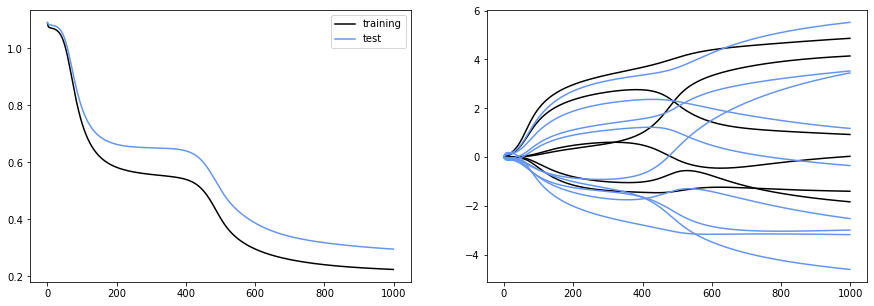

In [76]:
plt.figure(1, figsize=(15, 5))

## 학습 step 변화에 따른 오차(평균 교차 CrossEntropy)의 변화 시각화
plt.subplot(1, 2, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label ='test')
plt.legend()

## 학습 step 변화에 따른 가중치 변화 시각화
plt.subplot(1, 2, 2)
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

- 학습에 사용하지 않은 테스트 데이터 상에서도 경계선을 잘 그리는 것을 확인
- 수치 미분은 실행 속도가 느림

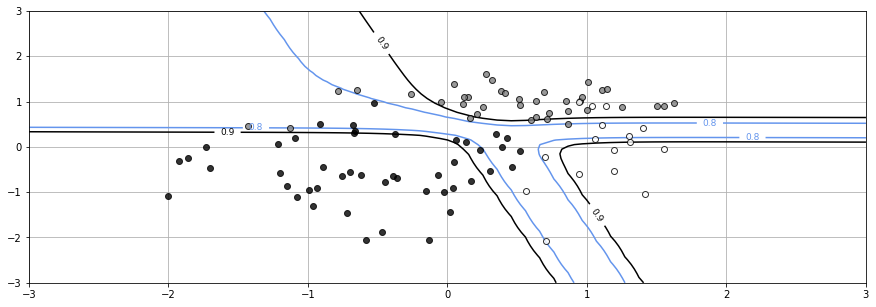

In [80]:
def show_FNN(wv, M, K):
    xn = 60                                        # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn) # 등고선 표시 해상도만큼 x0 생성(x0 범위에서 균등한 범위)
    x1 = np.linspace(X_range1[0], X_range1[1], xn) # 등고선 표시 해상도만큼 x1 생성(x1 범위에서 균등한 범위)
    xx0, xx1 = np.meshgrid(x0, x1)                 # grid 생성(시각화 용)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')] # 3600 * 2 metrix(x0 3600 vector 와 x1 3600 vector 결합)
    y, a, z, b = FNN(wv, M, K, x)                  # 네트워크 입력값 넣어 결과값 출력
    
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):                            # 출력 차원만큼 반복(질의)
        f = y[:, ic]                               # x(x0, x1)의 결과값 y에서 class 값 
        f = f.reshape(xn, xn)                      # 
        f = f.T                                    # 왜 전치를 할까?
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    
    ## 부가적인 시각화 
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 함수 호출 후 시각화
plt.figure(1, figsize=(15, 5))
Show_data(X_test, T_test)       # Test 데이터 위치(점 표시)
show_FNN(WV, M, K)              # Newwork 구분선
plt.show()

### 7.2.5 오차 역전파법

- 피드 포워드 신경망에 학습시키는 대표적인 방법: Backpropagation(오차 역전법)
- 네트워크 출력에서 발생하는 오차정보를 사용하여 출력치의 가중치에서 주간층의 가중치로 입력방향의 반대로 가중치를 갱신
- 사실상 "경사 하강법" 동일함 / 경사하강법을 적용하기 위해 오차함수 매개 변수로 편미분해서 구함

 [오차 함수(평균 Cross Entropy)]
$$E(w,v)=-\frac{1}{N}\displaystyle\sum_{n=0}^{n-1}\displaystyle\sum_{k=0}^{k-1}  {t_{nk}In(y_nk)}$$

### 7.2.6  $∂E_n/∂v_{kj}$

[1] 편미분의 연쇄법칙을 사용  $∂E_n/∂v_{kj}$ 두 미분의 곱으로 분해하기 
$$\frac{∂E}{∂v_{kj}}=\frac{∂E}{∂v_{k}}\frac{∂v_{k}}{∂v_{kj}}$$

[2]  $∂E/∂a_{k}$ 이해하기(k=0인 경우) 

$$\frac{∂E}{∂a_0}=\frac{∂}{∂a_0}(-t_0 logy_0 -t_1 logy_1 -t_2 logy_2)$$

[2-1] $t_k$(상수) / $y_k$($a_0$의 함수)

$$\frac{∂E}{∂a_0}=-t_0\frac{1}{y_0}\frac{∂y_0}{∂a_0}-\frac{1}{y_1}\frac{∂y_1}{∂a_1}-\frac{1}{y_2}\frac{∂y_2}{∂a_2}$$

[2-2] ∂y_0/∂a_0의 부분은 softmax함수로 인한 변형

$$\frac{∂y_0}{∂a_0}=y_0(1-y_0)$$

$$\frac{∂y_1}{∂a_0}=y_0(y_1)$$

$$\frac{∂y_2}{∂a_0}=y_0(y_2)$$

[2번-정리] 
$$\frac{∂E}{∂a_0}=y_0(1-y_0) + t_1y_0 +t_2y_0=y_0-t_0$$

[2번-확장]: k가 1, 2일때도 구할 수 있음

-  k=1
$$\frac{∂E}{∂a_1}=y_1-t_1$$
-  k=2
$$\frac{∂E}{∂a_2}=y_2-t_2$$  

#### [$∂E/∂a_{k}$의 최종 정리]

- 출력층(2층)의 오차와 같음
$$\frac{∂E}{∂a_{k}}=y_k-t_k => 	\delta_k^{(2)}$$

- 오차함수에 제곱오차일 경우
$$\frac{∂E}{∂a_{k}}=\delta_k^{(2)} =(y_k-t_k)h^{'}(a_k)$$


[3] $\frac{∂v_{k}}{∂v_{kj}}$의 경우

[3-1] k=0일때 경우의 $a_0$

$$a_0 = v_{00}z_0 +v_{00}z_0+v_{00}z_0$$

[3-2] k= 1,2로 확장
$$\frac{∂a_0}{∂v_{0j}}=z_j => \frac{∂a_k}{∂v_{kj}}=z_j $$

#### [$\frac{∂v_{k}}{∂v_{kj}}$의 최종 정리]

$$\frac{∂E}{∂v_{kj}}=\frac{∂E}{∂v_{k}}\frac{∂v_{k}}{∂v_{kj}} = (y_k-t_k)z_j=\delta_k^{(2)}z_j$$

#### 경사하강법 식
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{∂E}{∂v_{k,j}}=v_{k,j}(t)-α\delta_k^{(2)}z_j$$

#### 경사하강법 식
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{∂E}{∂v{kj}}=v_{k,j}(t)-α\delta_k^{(2)}z_j$$

[의미]
- 가중치$v_{kj}$ : 중간층(1층)의 뉴런 j에서 출력층(2층)의 뉴런 k에 정보를 전달하는 결합의 가중
- 오차($ \delta_k^{(2)}$) : 우리 예시에서 $z_{j}=σ(b_{j})$로  0 ~ 1 사이의 양수값
- 결론: 결합의 변경 크기(파라미터 갱신): 입력크기 $z_j$와 그앞에 생기는 오차 $ \delta_k^{(2)}$의 곱으로 결정

<br> 

- 출력 $y_k$가 목표데이터 $t_k$와 일치 => $ \delta_k^{(2)}=(y_k-t_k)=0$ 변경분이 0이 되어, 결과적으로 변하지 않음 

- 출력 $y_k$ 0보다 크고 목표데이터 $t_k$가 0일 경우 => $-α\delta_k^{(2)}z_j$는 음수 / $v_{kj}$는 감소하는 방향  

- 오차가 클 수록, 입력값이 클수록 그만큼 변화량 역시 커짐 / 반대 방향으로 수정하는 방향

### 7.2.7 $∂E_n/∂w_{ji}$

[1] 편미분의 연쇄법칙을 이용해서 $∂E/∂w_{ji}$를 분해

$$\frac{∂E}{∂w_{ji}}=\frac{∂E}{∂b_j}\frac{∂b_j}{∂w_{ji}}$$
 
[2] $w_{ji}$의 갱신규칙
- 앞선 정의한 출력층의 오차식과의 유사성 바탕으로 식을 도출(앞선 오차식)
$$  \frac{∂E}{∂a_k}=\delta_k^{(2)}=> \frac{∂E}{∂b_j}= \delta_j^{(1)}$$

-  $w_{ji}$의 갱신규칙
$$w_{ji}(t+1)=w_{ji}(t) - α\frac{∂E}{∂w_{ji}} = w_{ji}(t) -α \delta_j^{(1)}x_i$$

[3] $\delta_j^{(1)}$  정의

1. $\delta_j^{(1)}$를 연쇄규칙을 사용해 전개
$$\delta_j^{(1)} = \frac{∂E}{∂b_j} = \left\{ \displaystyle\sum_{k=0}^{k-1} \frac{∂E}{∂a_k}\frac{∂a_k}{∂z_j} \right\}\frac{∂z_j}{∂b_j}$$

2. 첫번째: $\frac{∂E}{∂a_k}$ => $\delta_j^{(2)}$ 표현 가능 

3. 두번째: $\frac{∂a_k}{∂z_j} = \frac{∂a_k}{∂z_j} = \frac{∂}{∂z_k}\displaystyle\sum_{j=0}^{M}v_{kj}z_j=v_{kj}$

[3 정리]
$\delta_j^{(1)} = h^{'}(b_j) \displaystyle\sum_{k=0}^{k-1}v_{kj}\delta_j^{(2)}$

[내용 설명]
- 오차역전파는 네트워크이 더 들어도 앞선 법칙들이 사용하여 간단하게 '가중치 매개변수의 학습 법칙 도출할 수 있음 / 이러한 특성으로 feedforward neuralnetwork의 경사하강법=오류역전파라 명명

#### [매개변수 갱신 방법 정리]

1.네트워크에 x 입력 y를 출력으로 얻으며, 중간에 계산된 b,z,a를 저장함

2.출력 y를 목표데이터 t와 비교해 그 오차(차이)를 계산(오차 출력층의 각 뉴런에 할당)

3.출력층의 오차를 사용해 중간층의 오차를 계산

4.결합 본래의 신호 강도와 결합처의 오차 정보를 사용하여 가중치 매개변수를 갱신


★★★
위 절차는 데이터 하나에 대한 갱신이다. 우리는 N개의 데이터를 다룰것이므로, 데이터를 하나씩 바꾸면서 1~4의 절차를 N번 처리해야한다.
</br></br>



#### [수식상 ㅇ확인]

*  1~4를 N개의데이터에 대해 반복(이것이 학습 1단계)
</br>
1.입력을 넣어 출력을 얻음
$$b_j =\displaystyle\sum_{i=0}^{D}w_{ji}x_i$$
$$z_j=h(b_j)$$
$$a_k=\displaystyle\sum_{j=0}^{M}v_kz_j$$
$$y_k = exp(a_k),\sum_{l=0}^{K-1} exp(a_l)$$

2,3.각 뉴런의 오차를 얻음
$$δ_k^{(2)} =y_k-t_k$$
$$δ_k^{(1)} =h(b_j)\displaystyle\sum_{K=0}^{K-1}v_{kj}δ_k^{(2)}$$

4.가중치를 갱신함
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{δ_k^{(2)}z_j}{N}$$
</br>
$$w_{kj}(t+1)=w_{kj}(t)-α\frac{δ_k^{(1)}x_i}{N}$$

#### 7.2.8 오류 역전파법의 구현

- 이제 경사 하강법, 즉 오차 역전파법으로 $\partial E / \partial w$ 및 $\partial E / \partial v$를 구하는 프로그램 생성(함수: dCE_FNN)
- $\partial E / \partial w$ 및 $\partial E / \partial v$는 프로그램에서 각각 dw, dv . 함수의 출력은 이들을 결합한 dwv로 정의

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


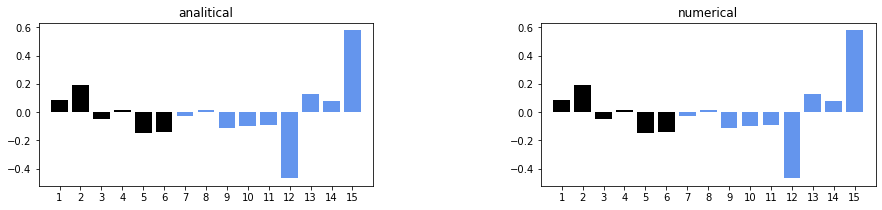

In [112]:
# 해석적 미분 함수
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    
    ## wv을 w와 v로 다시 나눔(wv가 w와 v를 합친 parameter vector)
    w = wv[:M * (D + 1)]        # wv vector 中 w 부분 추출
    w = w.reshape(M, (D + 1))   # 원래 w의 형태(은닉층 차원 * (입력 +1))
    v = wv[M * (D + 1):]        # wv vector 中 v 부분 추출
    v = v.reshape((K, M + 1))   # 원래 v의 형택(출력층 차원 * (은닉층 차원 + 1)) +1은 상수
    
    ## ① 입력값을 네트워크에 투입 후 출력 값 얻음
    y, a, z, b = FNN(wv, M, K, x)
    
    ### 출력 변수 정의
    dwv = np.zeros_like(wv)     #  parameter vector 생성 
    dw = np.zeros((M, D + 1))   #  w의 가중치 미분값 
    dv = np.zeros((K, M + 1))   #  v의 가중치 미분값
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    
    
    for n in range(N):          #  데이터 개수만큼 반복
        
        ## ② 출력층의 오차를 구하기(y - t)
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        ## ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        ## ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        ## ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


# dwv의 시각화 코드 (해석적 미분 parameter의 결과값)
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')              # w의 parameter 값 시각화(입력 -> 은닉)
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align="center", color='cornflowerblue') # v의 parameter 값 시각화(은닉 -> 출력)
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
    
    
#-- 동작 확인
## Network 필요한 parameter 저장(은닉층 뉴런 수 / 출력 차원 수, 초기 매개변수)
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)        
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

## 결과값 확인(print)
### 해석적 미분 결과 (dcE_FNN)
dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

### 해석적 미분 결과 (dcE_FNN)
dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

## 해석적 미분과 수치적 미분의 결과값 비교 시각화
plt.figure(1, figsize=(15, 3))
plt.subplots_adjust(wspace=0.5)

### 해석적 미분 결과 (dcE_FNN)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')

### 수치적 미분 결과
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

#### 결과 해석 
- 해석적 미분값과 계산한 수치 미분값과 거의 일치 /  그래프 상으로 거의 동일
- 수치 미분에 의한 계산은 훨씬 빨리 끝남 

In [116]:
import time

# 해석적 미분 함수식
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()                     # 초기 매개변수 값 할당
    err_train = np.zeros(n)                 # Train 데이터 error를 해석적 미분법 적용한 경사 하강법 과정에서) 저장할 array (변화 확인)
    err_test = np.zeros(n)                  # Test 데이터 error를 저장할 array
    wv_hist = np.zeros((n, len(wv_init)))   # 매개변수 array 생성(행: 학습 step)
    epsilon = 0.001                         # 엡실론
    
    ## 경사하강법 진행하면서 갱신된 parameter의 error 변화 저장
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # 경사하강법(기존 매개변수 값 - 갱신률 * 수치 미분)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)     
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 호출
startTime = time.time()

## 각 변수들 정의 
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1)) # 초기 매개변수 할당(평균:0 표준편차: 0.01 정규분포를 따르는 sample 생성)
N_step = 1000                                            # 학습 단계 횟수
alpha = 1                                                # 갱신률

WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)

## 걸린 시간 표현

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:15.698 sec


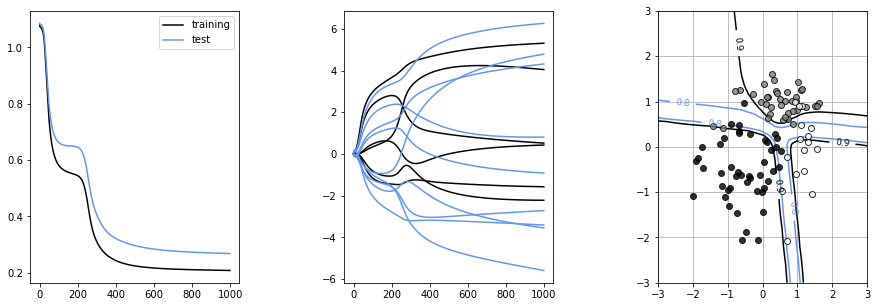

In [117]:
plt.figure(1, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)

## 각 학습 step마다의 error 변화 시각화
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()

## 각 학습 step마다 parameter 결과값 변화 시각화
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')

## 학습 후 test 데이터와 임계값 시각화
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

#### 결과해석
- 수치 미분과 유사한 결과
- 네트워크의 규모가 커질수록 미분 계산 속도의 중요성이 커짐 

[1] 오차역전파: parameter 빠른 속도로 갱신 

[2] 수치미분: 도출된 미분방정식이 맞는지 확인하는 도구(새로운 오차 함수의 미분 방정식을 구할 경우에는 먼저 수치 미분으로 올바른 값으로 구해서 올바른 미분식인지 보는 것은 매우 중요

####  주요 프로그램 정리
- Fit_FNN: 네트워크 매개 변수를 구하는 프로그램
- Train(X_train과 T_train)로 parameter vector(wv)학습 후 test(X_test, T_test) 평가
- 오차 함수(크로스 엔트로피) 줄이는 방향의 Parameter를 구하기 위해 크로스 엔트로피를 구하는 CE_FNN과 미분 dCE_FNN이 사용
- 함수에서 네트워크의 출력 FNN이 사용

### 7.2.9 학습 후 뉴런의 특성

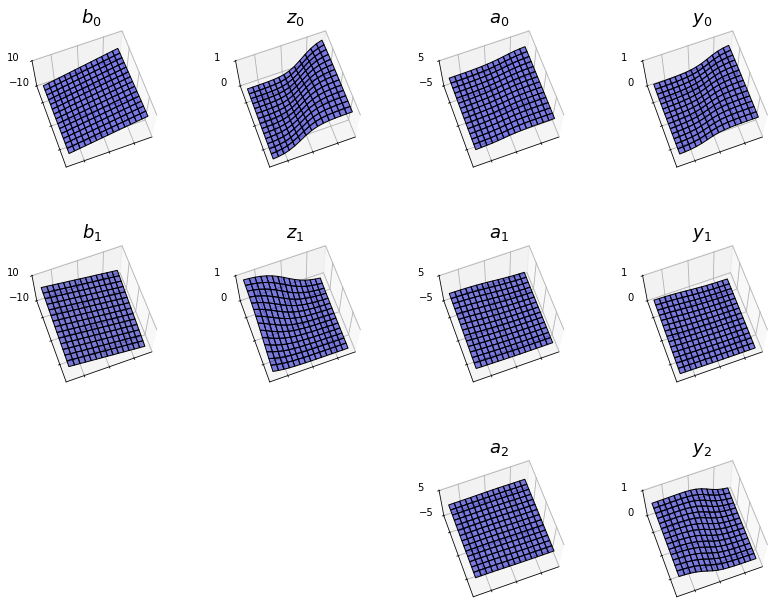

In [115]:
from mpl_toolkits.mplot3d import Axes3D


def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black', rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
        
M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
    
    
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))


plt.show()

#### 결과해석: 그래프는 다양한 입력 vector에 따른 변수의 값 변화

[1단계: zj]
- 중간층 입력 총합(bj): 입력 xi의 선형 합/ 입출력 맵: 평면
- 면의 기울기가 가중치에 의해 결정
- 중간층 입력 총합(bj)이 활성화 함수(sigmoid) 지나가면 낮은 부분과 높은 부분은 0 ~ 1 범위의 출력으로 변환(zj)
- w에 의하여 면의 기울기가 결정된다.
- 입력 총합 bj의 입출력 맵은 시그모이드 함수를 빠져나가면 낮은 부분과 높은 부분이 각각 0과 1 범위에 넣어진 출력 zj가 된다.

[2단계: aj]
- 출력층의 입력 총합(ak);  z0, z1 의 두 입출력 맵의 선형 합으로 입출력 맵이 구성
- 정리하면: a의 맵은 z0와 z1의 되풀이되는 특징, 조합에 의해서 형성

[3단계: yj]
- a는 소프트맥스 함수를 지나 0~1의 범위k가 만들어짐
- 소프트맥스 함수에서 처리된 결과  0,1,2의 면을 모두 더하면 높이가 1인 평면이 반드시 되어야함 

### 7.3 케라스로 신경망 구현 

- 3분류 문제를 푸는 2층 피드포워드 네트워크 만들기
- 케라스 라이브러리(대규모 신경망이 비교적 짧은 코드로 구현되며 빠르게 동작)

In [119]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [120]:
# 필요 모듈, 난수 고정
import numpy as np
import matplotlib.pyplot as plt
import time
import keras.optimizers 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 

# 난수 초기화: Keras 내부에서 사용되는 난수를 초기화
np.random.seed(1)

# 데이터 불러오기(앞선 정의 했던 npz에서 불러오기)
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

# 데이터 시각화 (재정의)
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]  # 각 class별 다른 색깔 표현
    for i in range(n):                       # for문 돌아가면서 
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

#### Keras 사용 흐름

- 앞선 7.2에서 정의한 Network를 간결한 구조로 정의할 수 있음 (모델을 정의후 층을 추가해 네트워크를 구성하는 방식)
1. 네트워크 코드 설명

[1] Sequential(): 변수가 아닌 Sequential 클래스에서 정의된 객체  
[2] Dense(): 전결합형의 층  
Dense(뉴런의 수, input_dim =  입력 차원 정의, activation = 활성화 함수 정의, kernel_intializer = 매개 변수 초기값 방식) / 더미는 자동으로 설정

    -> 첫번째 층의 입력차원 2 / 뉴런의 수 2 / 활성화 함수는 'sigmoid' / 가중치 매개변수의 초기값을 균일하게 설정(은닉층)
    -> 두번째 층의 뉴런의 수 3 / 활성화 함수는 'softmax' (출력으 위해) / 가중치 매개변수의 초기값을 균일하게 설정(은닉층)
   
[3] model 객체에 add를 사용해 층을 추가 

2. 학습 과정 

[1] Optmizer 설정: 학습 방법의 설정 / keras.optimizer.SGD()
- learning rate -> 학습 속도, model에 compile할 때 값을 전달함

[2] model compile: 모델을 compile 하는 방법 / model.compile
- optimizer, loss와 metric를 정의
- loss를 'categorical_crossentropy'로 교차 Cross entropy 정의
- 평가지표: 정답률을 계산

[3] 학습: model.fit
- 인수로 X_train, T_train은 훈련 데이터 지정 
- Batch size: Gradient 계산하는 데 사용되는 학습 데이터 수 
- epoch: 전체 데이터를 몇번 반복해서 학습할 것인가(횟수)
- verbose: 학습 진행 상황 표시등(표시 않음)
- validation_data = (X_test, T_test) 평가용 데이터의 지정 / validation_split => train 데이터 내에서 일정 비율로 빼서 validation 구축
- 출력의 history는 학습 과정의 정보가 포함

3. 평가: model.evaluate()
- 해당 결과값에는 (index 0) test data의 오차 값(Cross Entropy) / (index 1) test data의 metrix 결과값(정확도 값)

#### 단어 설명
- 전결합형(Fully Connected layer): 이전 층의 모든 유닛과 연결되어 구조

In [122]:
## 네트워크 정의 
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform'))
model.add(Dense(3,activation='softmax', kernel_initializer='uniform'))

##  optimizer설정 후 모델 compile
sgd = keras.optimizers.SGD(lr=1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


## 모델 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test)) 


## 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) 
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))

## 걸린 시간 
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.28, accuracy 0.90
Calculation time:32.077 sec


- 학습 과정에서의 훈련 데이터의 오차(교차 엔트로피 오차)과 metric(정답률) histroy내에서 저장되어서 볼 수 있음
- 학습이 완료된 모델은 임의의 입력값 x에 대한 예측을 진행할 수 있음: model.predict(x)

#### 결과 정리
- Train 데이터 오차가 감소, Test 데이터 오차도 증가하지 않고 감소하고 있어 Overfitting 일어나지 않고 있음
- Metrics(정확도) 정답률이 1에 가까워지고 있지만 / 목적함수와 다른점은 때로는 감소가 일어날 수 있음
- 정확도는 성능을 직관적으로 알 수 있기 때문에 Network(Model)의 성능 평가에 자주 사용됨
- Cateogry 경계선이 적절하게 위치하고 있음을 확인할 수 있음

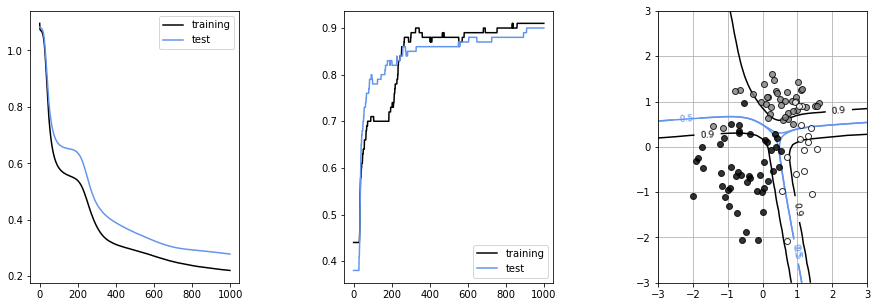

In [126]:
# 결과 시각화
plt.figure(1, figsize = (15, 5))
plt.subplots_adjust(wspace=0.5)


## 학습 loss 변화 시각화
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training')           # Train loss 변화 (history 저장)
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test')  # Validation loss 변화(history 저장)
plt.legend()

## 학습 정확도 변화 시각화
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='training')           # train accurayc 정혹도
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test')  # validation accuracy
plt.legend()


## 시각화
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60                                                                     # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
y = model.predict(x)                                                        # 모델이 
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()